## Block Move

In [10]:
using TrajectoryOptimization, LinearAlgebra, Plots

Create an inplace the double integrator dynamics function

In [2]:
function dynamics!(ẋ,x,u)
    ẋ[1] = x[2]
    ẋ[2] = u[1]
end

dynamics! (generic function with 1 method)

Create a continuous model

In [3]:
n = 2
m = 1
model = Model(dynamics!,n,m);

Create a discrete model

In [4]:
model_d = rk3(model)

Define initial and goals states

In [6]:
x0 = [0.; 0.]
xf = [1.; 0.];

Define a problem discretization

In [7]:
N = 21 # number of knot points
dt = 0.1; # time step

Define initial control trajectory

In [8]:
U0 = [0.001*rand(m) for k = 1:N-1]; # initial control trajectory

Define objective

In [11]:
Q = 1.0*Diagonal(I,n)
Qf = 1.0*Diagonal(I,n)
R = 1.0e-1*Diagonal(I,m)
obj = TrajectoryOptimization.LQRObjective(Q,R,Qf,xf,N); # objective

Define constraints

In [12]:
u_max = 1.5
u_min = -1.5
bnd = BoundConstraint(n,m,u_max=u_max, u_min=u_min)

goal = goal_constraint(xf)

constraints = Constraints(N) 
for k = 1:N-1
    constraints[k] += bnd
end
constraints[N] += goal;

Construct problem

In [14]:
prob = Problem(model_d, obj, constraints=constraints, x0=x0, xf=xf, N=N, dt=dt)
initial_controls!(prob,U0); # initialize problem with controls

Solve problem

In [15]:
solver = solve!(prob, ALTROSolverOptions{Float64}()); # solve with ALTRO

┌ Info: Augmented Lagrangian solve...
└ @ TrajectoryOptimization /home/taylor/.julia/dev/TrajectoryOptimization/src/solvers/altro/altro_methods.jl:24


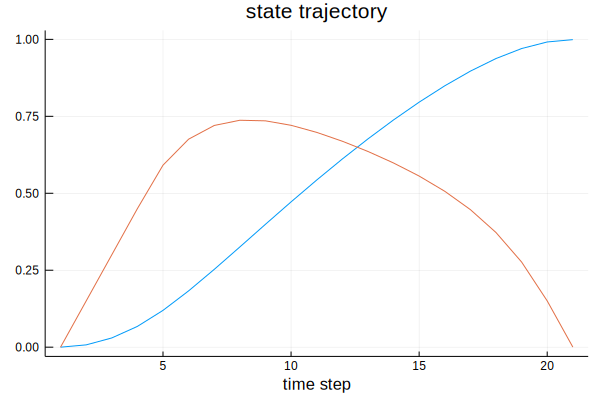

In [16]:
plot(prob.X,xlabel="time step",legend=:none,title="state trajectory")

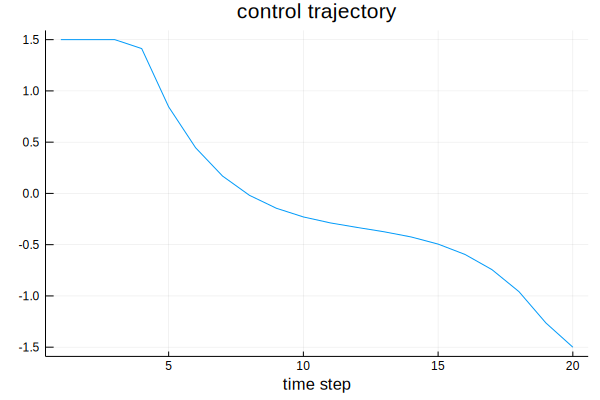

In [17]:
plot(prob.U,xlabel="time step",legend=:none,title="control trajectory")